Polynomial Regression
------------------------------

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dstools import connect

from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
os.listdir('..\data\Regression\Bike-Sharing-Dataset')

['day.csv', 'hour.csv', 'Readme.txt']

In [3]:
data_file = r'..\data\Regression\Bike-Sharing-Dataset\day.csv'

raw_data = connect.file_connect(data_file, 'CSV')
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
raw_data.shape

(731, 16)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 97.1+ KB


In [6]:
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


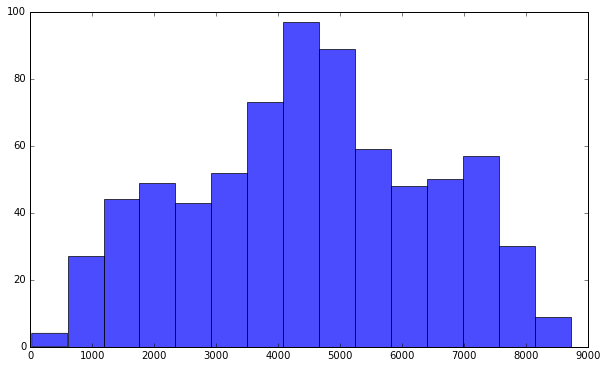

In [7]:
plt.figure(figsize= (10,6))
plt.hist(raw_data['cnt'], bins= 15, alpha= 0.7)
plt.show()

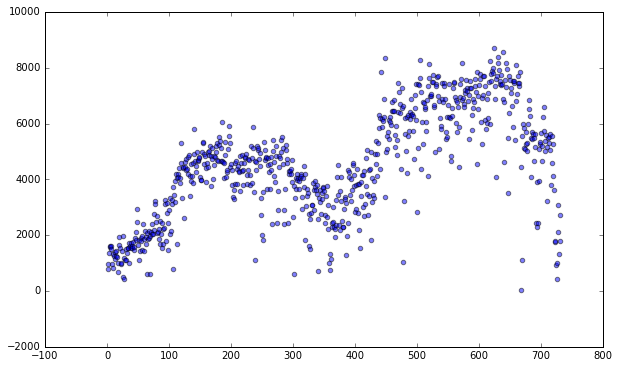

In [8]:
plt.figure(figsize= (10,6))
plt.scatter(x= raw_data[['instant']], y= raw_data[['cnt']], alpha= .5)
plt.show()

In [9]:
raw_data[:10]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [12]:
# Divide data into training and test sets
train_data, test_data = train_test_split(raw_data, test_size= 0.2, random_state= 0)  #random_state==seed

raw_data_X_train = train_data['instant']
raw_data_y_train = train_data['cnt']

raw_data_X_test = test_data['instant']
raw_data_y_test = test_data['cnt']

print('train:', len(train_data), 'test:', len(test_data))

train: 584 test: 147


In [15]:
train_data['instant'].values

array([ 98, 504, 643, 499, 304, 571, 251,  18, 596, 241, 548, 326, 286,
       673, 653, 702, 494,  46, 549,  63, 531, 314, 589, 141, 295, 521,
       128, 205, 353, 359, 145, 311,  22, 651, 425,  36, 453, 338, 510,
        78, 452, 232, 332, 110, 413, 102, 490, 642, 231, 709, 279, 469,
       318, 345, 721, 259, 506, 166, 189, 317,  35, 533, 594, 728, 335,
       440, 646, 156, 392, 572, 307, 201, 236, 525,  13, 162, 557, 503,
       474, 723, 502, 160, 364, 410, 230,  79,  93, 691,  67, 694, 501,
       436, 303, 669, 404, 396, 565, 650,  16, 402, 246, 498,   7, 363,
        72, 435, 437, 375, 493, 105, 684, 517, 403,  91, 417, 376, 313,
       219, 692, 284, 206, 365, 191, 461, 356, 195, 593, 133, 234, 174,
       179, 707, 609, 207,  97, 628, 316, 623,  90, 381, 180,   1,  47,
       172, 584, 351, 108, 134, 419, 224, 550, 103, 109, 214, 482, 409,
       247, 606, 543, 126, 423, 527, 386, 592, 225,  27, 539, 515, 328,
         4, 135, 339, 187, 459, 296, 666, 401, 578, 658, 226, 59

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(raw_data_X_train, raw_data_y_train)

plt.figure(figsize= (10,6))
plt.scatter(raw_data_X_test, raw_data_y_test, color= 'blue')
plt.plot(raw_data_X_test, reg.predict(raw_data_X_test), color= 'orange')
plt.show()

In [ ]:
plt.figure(figsize= (16,8))

plt.scatter(raw_data_X_test, 
            raw_data_y_test, 
            color= 'blue', 
            alpha= 0.6, 
            linewidths= 1, 
            edgecolors= 'black', 
            s= 100)


model = make_pipeline(PolynomialFeatures(degree=10), linear_model.LinearRegression())
model.fit(raw_data_X_train[['instant']].values, raw_data_y_train.values)

y_hat = model.predict(raw_data_X_test.values)

plt.plot(raw_data_X_test, y_hat, color= 'orange')

plt.show()

In [ ]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
#plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

'''
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw, label="degree %d" % degree)

plt.legend(loc='lower left')
'''

plt.show()

In [ ]:
X

In [ ]:
raw_data_X_train[['instant']].values

In [ ]:
y

In [ ]:
raw_data_y_train.values

In [ ]:
X_plot

In [ ]:
raw_data_X_test.values

In [ ]:
x_plot